<div style="text-align: center;">
<h1>Assignment 1: Substitution Ciphers</font></h1>
<h2>Course: Elements of Applied Data Security</font></h2>

<center><img src="../images/unibo.png" alt="unibo_logo" width="200"/></center>

<h3>Professor: Alex Marchioni and Livia Manovi</font></h3>
<h3>University: Università degli Studi di Bologna</font></h3>
<h3>Author: Lluis Barca Pons</font></h3>
<h3>Date: 2024-03-25</font></h3>
</div>

## Importing Libraries

In [1619]:
import string
import os
import matplotlib.pyplot as plt
import pickle

# English alphabet
ALPHABET = string.ascii_lowercase

## Introduction

Substitution ciphers represent one of the oldest and simplest classes of encryption techniques, relying on the principle of replacing each element (typically characters in plaintext) with another character or symbol according to a predefined system or key. 

Unlike transposition ciphers that rearrange the order of the elements, substitution ciphers maintain the original sequence but alter the identities of the elements involved. A classic example is the Caesar cipher, where each letter in the plaintext is shifted a certain number of places down or up the alphabet. 

Modern variants have evolved to include complex schemes like the monoalphabetic cipher, which maps each letter of the plaintext to a unique letter in the ciphertext alphabet, and the polyalphabetic cipher, which uses multiple substitution alphabets to reduce the predictability of the encryption. Despite their simplicity, substitution ciphers laid the foundational concepts for understanding more advanced cryptographic systems and their vulnerabilities.

## Caesar Cipher

Brief description of Caesar Cipher (Max 150 words)

Types of attack of Caesar Cipher (Max 150 words)

### Encryption

In [1620]:
def caesar_encrypt(plaintext, shift=0):
    """Encrypt `plaintext` (str) as a caesar cipher with a given `shift` (int)"""
    # Convert the plaintext to a list of characters
    plaintext = list(plaintext)

    # Convert the characters to their ASCII values
    plaintext = [ord(char) for char in plaintext]

    # Shift the ASCII values if the character is a letter
    for i in range(len(plaintext)):
        if 65 <= plaintext[i] <= 90:  # Uppercase
            plaintext[i] = (plaintext[i] - 65 + shift) % 26 + 65
        elif 97 <= plaintext[i] <= 122:  # Lowercase
            plaintext[i] = (plaintext[i] - 97 + shift) % 26 + 97

    # Convert the shifted ASCII values back to characters
    plaintext = [chr(char) for char in plaintext]

    # Convert the list of characters to a single string
    ciphertext = "".join(plaintext)

    return ciphertext

In [1621]:
# code snippet to test the implementation of the encryption function
plaintext = "hello!"
ciphertext = caesar_encrypt(plaintext, shift=4)

print(plaintext, "->", ciphertext)  # expected output 'hello! -> lipps!'

hello! -> lipps!


### Decryption

In [1622]:
def caesar_decrypt(ciphertext, shift=0):
    """Decrypt `ciphertext` (str) as a caesar cipher with a given `shift` (int)"""
    # Convert the ciphertext to a list of characters
    ciphertext = list(ciphertext)

    # Convert the characters to their ASCII values
    ciphertext = [ord(char) for char in ciphertext]

    # Shift the ASCII values if the character is a letter
    for i in range(len(ciphertext)):
        if 65 <= ciphertext[i] <= 90:  # Uppercase
            ciphertext[i] = (ciphertext[i] - 65 - shift) % 26 + 65
        elif 97 <= ciphertext[i] <= 122:  # Lowercase
            ciphertext[i] = (ciphertext[i] - 97 - shift) % 26 + 97

    # Convert the shifted ASCII values back to characters
    ciphertext = [chr(char) for char in ciphertext]

    # Convert the list of characters to a single string
    plaintext = "".join(ciphertext)

    return plaintext

In [1623]:
# code snippet to test the implementation of the decryption function
ciphertext = "lipps!"  # 'hello!' encoded with shift=4
plaintext = caesar_decrypt(ciphertext, shift=4)

print(ciphertext, "->", plaintext)  # expected output 'lipps! -> hello!'

lipps! -> hello!


### Ciphertext

In [1624]:
# Load ciphertext
def read_file(file_name):
    """Read the content of a file and return it as a string"""
    try:
        with open(file_name, "r", encoding="utf-8") as file:
            return file.read()
    except (IOError, OSError, FileNotFoundError) as e:
        print(e.strerror)


file_path = os.path.join("ciphertext_caesar.txt")
ciphertext = read_file(file_path)

### Brute Force Attack

Breaking a Caesar cipher, a process also known as decryption or cracking, exploits its fundamental weakness: the limited number of possible shifts in the alphabet.

If we use the **brute force attack**, given the Caesar cipher’s reliance on shifting letters by a fixed number, one can systematically try all 26 possible shifts (excluding the trivial shift of 0) until the decrypted text makes sense. This method is guaranteed to find the correct shift, as the alphabet’s finite size ensures all possibilities are tested.

In [1625]:
sample = ciphertext[:20]
for shift in range(len(ALPHABET)):
    plaintext = caesar_decrypt(sample, shift=shift)
    print(f"Shift {shift}: {plaintext}")

Shift 0: aucom dofcom wuymul 
Shift 1: ztbnl cnebnl vtxltk 
Shift 2: ysamk bmdamk uswksj 
Shift 3: xrzlj alczlj trvjri 
Shift 4: wqyki zkbyki squiqh 
Shift 5: vpxjh yjaxjh rpthpg 
Shift 6: uowig xizwig qosgof 
Shift 7: tnvhf whyvhf pnrfne 
Shift 8: smuge vgxuge omqemd 
Shift 9: rltfd ufwtfd nlpdlc 
Shift 10: qksec tevsec mkockb 
Shift 11: pjrdb sdurdb ljnbja 
Shift 12: oiqca rctqca kimaiz 
Shift 13: nhpbz qbspbz jhlzhy 
Shift 14: mgoay paroay igkygx 
Shift 15: lfnzx ozqnzx hfjxfw 
Shift 16: kemyw nypmyw geiwev 
Shift 17: jdlxv mxolxv fdhvdu 
Shift 18: ickwu lwnkwu ecguct 
Shift 19: hbjvt kvmjvt dbftbs 
Shift 20: gaius julius caesar 
Shift 21: fzhtr itkhtr bzdrzq 
Shift 22: eygsq hsjgsq aycqyp 
Shift 23: dxfrp grifrp zxbpxo 
Shift 24: cweqo fqheqo ywaown 
Shift 25: bvdpn epgdpn xvznvm 


In [1626]:
# Decrypt the ciphertext
plaintext = caesar_decrypt(ciphertext, 20)
print(plaintext)

gaius julius caesar (12 july 100 bc - 15 march 44 bc) was a roman general and statesman. a member of the first triumvirate, caesar led the roman armies in the gallic wars before defeating his political rival pompey in a civil war, and subsequently became dictator from 49 bc until his assassination in 44 bc. he played a critical role in the events that led to the demise of the roman republic and the rise of the roman empire.
in 60 bc, caesar, crassus, and pompey formed the first triumvirate, an informal political alliance that dominated roman politics for several years. their attempts to amass political power were opposed by many in the senate, among them cato the younger with the private support of cicero. caesar rose to become one of the most powerful politicians in the roman republic through a string of military victories in the gallic wars, completed by 51 bc, which greatly extended roman territory. during this time he both invaded britain and built a bridge across the river rhine. 

## Simple Substitution Cipher

A Simple Substitution Cipher is a cryptographic method where each letter in the plaintext is replaced with a letter that has a fixed relationship to it, according to a predefined substitution alphabet. Unlike the Caesar cipher, which shifts letters by a fixed number, the Simple Substitution Cipher uses a one-to-one mapping where each letter in the plaintext alphabet is matched with a unique letter in the ciphertext alphabet. This mapping is the cipher's key. For example, 'A' might be replaced with 'M', 'B' with 'X', and so on, completely scrambling the message. The key to decryption is knowing the specific letter mappings used in the encryption process. 

Due to its reliance on a single alphabet transformation, the Simple Substitution Cipher is vulnerable to frequency analysis, as patterns in letter usage can reveal clues about the substitution. Despite this, it significantly increases complexity compared to the Caesar cipher by offering a much larger number of possible keys.

Simple Substitution Ciphers are vulnerable to several types of attacks due to their reliance on fixed mappings between plaintext and ciphertext characters. The primary attack methods include:

1. **Frequency Analysis**: This involves studying the frequency of letters or groups of letters in the ciphertext and comparing them with known frequencies in the language of the plaintext. Since each letter maps to a specific substitute, the patterns can reveal the substitution scheme.

2. **Known Plaintext Attack**: If the attacker has access to even small portions of both the plaintext and corresponding ciphertext, they can deduce the mapping of several letters, which can be extended to crack the entire cipher.

3. **Pattern Words Analysis**: Words or phrases that repeat in the ciphertext can be analyzed for patterns. Since certain words in languages have characteristic repeating patterns, these can be matched against the patterns in the ciphertext to identify possible word matches.

4. **Brute Force Attack**: Though impractical due to the vast number of possible keys (26!), a brute force attack could theoretically try every possible mapping until the correct one is found.

### Encryption

Explain how the encryption of a Simple Substitution Cipher works (Max 150 words)

In [1627]:
def substitution_encrypt(plaintext, mapping):
    """Encrypt `ciphertext` (str) as a simple substitution cipher with a given
    `mapping` (??) from plaintext letters to ciphertext letters"""

    # Convert the plaintext to a list of characters
    plaintext = list(plaintext)

    # Apply the mapping to the plaintext
    for i in range(len(plaintext)):
        if plaintext[i] in mapping:
            plaintext[i] = mapping[plaintext[i]]

    # Convert the list of characters to a single string
    ciphertext = "".join(plaintext)

    return ciphertext

In [1628]:
# code snippet to test the implementation of the encryption function
plaintext = "hello!"
mapping = {"h": "a", "e": "p", "l": "w", "o": "q"}

ciphertext = substitution_encrypt(plaintext, mapping)

print(plaintext, "->", ciphertext)  # expected output 'hello! -> apwwq!'

hello! -> apwwq!


### Decryption

Explain how the decoder of a Substitution Cipher works (Max 150 words)

In [1629]:
def substitution_decrypt(ciphertext, mapping):
    """Decrypt `ciphertext` (str) as a simple substitution cipher with a given
    `mapping` (dict) from plaintext letters to ciphertext letters"""

    # Convert the ciphertext to a list of characters
    ciphertext = list(ciphertext)

    # Apply the mapping to the ciphertext
    for i in range(len(ciphertext)):
        for key, value in mapping.items():
            if ciphertext[i] == key:
                ciphertext[i] = value
                break

    # Convert the list of characters to a single string
    plaintext = "".join(ciphertext)

    return plaintext

In [1630]:
# code snippet to test the implementation of the decryption function
test_mapping = {"h": "a", "e": "p", "l": "w", "o": "q"}  # previous mapping
ciphertext = "apwwq!"

plaintext = substitution_decrypt(ciphertext, test_mapping)

print(ciphertext, "->", plaintext)  # expected output 'apwwq! -> hello!'

apwwq! -> apwwq!


### Ciphertext

In [1631]:
# Load ciphertext
file_path = os.path.join("ciphertext_simple.txt")
ciphertext = read_file(file_path)

### Frequency Analysis Attack

Describe the procedure to break a Simple Substitution Cipher (Max 150 words)

#### English Letters Distribution

In [1632]:
def letter_distribution(text):
    """Return the `distribution` (??) of the letters in `text` (str)"""

    # Create a dictionary to store the distribution of the letters
    distribution = {}

    # Count the number of times each letter appears in the text
    for letter in text:
        # Only consider the letter if it is an alphabet letter
        if letter.isalpha():
            # If the letter is already in the distribution, increment its count
            if letter.lower() in distribution:
                distribution[letter.lower()] += 1
            else:
                distribution[letter.lower()] = 1

    # Make the probability of each letter
    total = sum(distribution.values())
    for key in distribution:
        distribution[key] /= total

    # Sort the distribution alphabetically
    distribution = dict(sorted(distribution.items()))

    return distribution

In [1633]:
# code snippet to test the implementation of `letter_distribution`
text = "hello world!"

letter_distribution(text)
# expected ouput:
# {'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1, ...}

{'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1}

In [1634]:
# load text
file_path = os.path.join("The-Adventure-of-the-Dancing-Men.txt")
english_text = read_file(file_path)

In [1635]:
# estimate the English letters distribution
distribution = letter_distribution(english_text)
print(distribution)

{'a': 0.07975719581063263, 'b': 0.01465283478866582, 'c': 0.02547453790083837, 'd': 0.043460954797621715, 'e': 0.12398935243923676, 'f': 0.021419508918576014, 'g': 0.016966440281613055, 'h': 0.06669651964076921, 'i': 0.06993059183521158, 'j': 0.0008209567878199865, 'k': 0.007637385874567754, 'l': 0.038485459113864216, 'm': 0.02689255417070926, 'n': 0.06853745304375948, 'o': 0.07838893449759933, 'p': 0.016742542975843967, 'q': 0.000895589223076349, 'r': 0.0561982237480409, 's': 0.06301465283478866, 't': 0.0915242431027191, 'u': 0.03022613627882678, 'v': 0.009727094061745902, 'w': 0.026021842426051694, 'x': 0.0014180162698708859, 'y': 0.020722939522849964, 'z': 0.00039803965470059955}


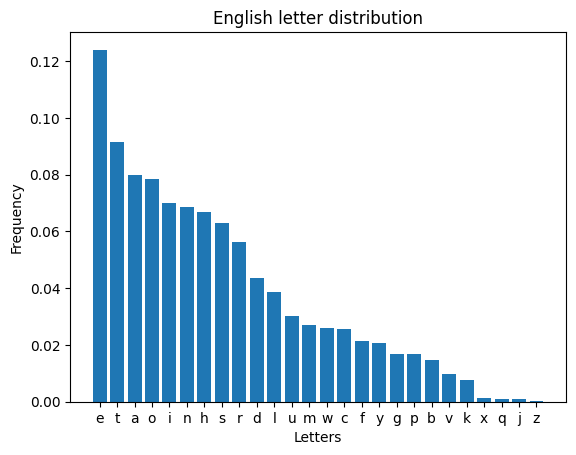

In [1636]:
# plot the English letter distribution by decreasing order of frequency
sorted_letters = sorted(
    distribution.keys(), key=lambda x: distribution[x], reverse=True
)
sorted_frequencies = [distribution[letter] for letter in sorted_letters]

plt.bar(sorted_letters, sorted_frequencies)

plt.title("English letter distribution")
plt.xlabel("Letters")
plt.ylabel("Frequency")
plt.show()

In [1637]:
# store the distribution as a pickle file
try:
    with open("english_distribution.pkl", "wb") as file:
        pickle.dump(distribution, file)
except (IOError, OSError) as e:
    print(e.strerror)

#### Perform attack

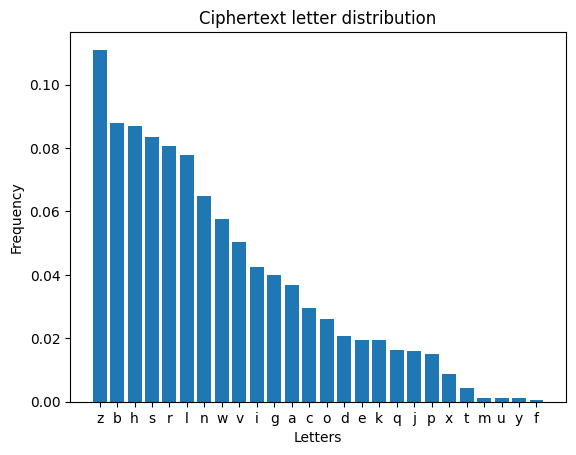

In [1638]:
# plot the ciphertext letter distribution by decreasing order of frequency
ciphertext_distribution = letter_distribution(ciphertext)

sorted_letters = sorted(
    ciphertext_distribution.keys(),
    key=lambda x: ciphertext_distribution[x],
    reverse=True,
)
sorted_frequencies = [ciphertext_distribution[letter] for letter in sorted_letters]

plt.bar(sorted_letters, sorted_frequencies)

plt.title("Ciphertext letter distribution")
plt.xlabel("Letters")
plt.ylabel("Frequency")
plt.show()

In [1639]:
# perform Frequency analysis attack

# Initialize the frequency mapping dictionary
freq_mapping = {}

def frequency_analysis_attack(ciphertext):
    """Decrypt `ciphertext` (str) using frequency analysis"""

    # Load the English letter distribution
    with open("english_distribution.pkl", "rb") as file:
        english_distribution = pickle.load(file)
        # Order the English letter distribution by frequency in descending order
        english_distribution = dict(
            sorted(english_distribution.items(), key=lambda x: x[1], reverse=True)
        )

    # Sort the ciphertext distribution by frequency in descending order
    sorted_distribution = dict(
        sorted(ciphertext_distribution.items(), key=lambda x: x[1], reverse=True)
    )

    # Mapping the 8 most frequent letters in the ciphertext to the 8 most frequent letters in English
    for i in range(len(ALPHABET)):
        freq_mapping[list(sorted_distribution.keys())[i]] = list(english_distribution.keys())[i]


    # Decrypt the ciphertext using the mapping
    plaintext = substitution_decrypt(ciphertext, freq_mapping)

    return plaintext


# Perform frequency analysis attack on the ciphertext
decrypted_text = frequency_analysis_attack(ciphertext)

In [1640]:
# print mapping
print(freq_mapping)

{'z': 'e', 'b': 't', 'h': 'a', 's': 'o', 'r': 'i', 'l': 'n', 'n': 'h', 'w': 's', 'v': 'r', 'i': 'd', 'g': 'l', 'a': 'u', 'c': 'm', 'o': 'w', 'd': 'c', 'e': 'f', 'k': 'y', 'q': 'g', 'j': 'p', 'p': 'b', 'x': 'v', 't': 'k', 'm': 'x', 'u': 'q', 'y': 'j', 'f': 'z'}


In [1641]:
print(ciphertext[:200])

gihoaz zijlla nvhbblb (hkwri 30, 1916 dzpwohwq 24, 2001) jhn hb hczwrghb chsvzchsrgrhb, zizgswrghi zberbzzw, glckoszw ngrzbsrns hba gwqkslewhkvzw tbljb hn svz "dhsvzw ld rbdlwchsrlb svzlwq". vz jhn sv


In [1642]:
# print decrypted plaintext
print(decrypted_text)

ldawue edpnnu hrattnt (aysid 30, 1916 cebswasg 24, 2001) pah at amesilat maoremaoiliat, edelosilad etfitees, lnmywoes hlietoiho atu lsgyonfsayres ktnpt ah ore "caores nc itcnsmaoint orensg". re pah ore cisho on uehlsibe ore bnndeat faoeh (edelosntil lislwioh) orao ase ehhetoiad on add uifioad edelosntil lislwioh, atu re bwido ore cisho malrite deastitf uevile, orwh cnwtuitf ore ciedu nc asoiciliad itoeddifetle. re ih lseuioeu adntfhiue fensfe bnnde cns dagitf ore cnwtuaointh nc ore itcnsmaoint afe.ah a 21-geas-ndu mahoes'h uefsee howueto ao ore mahhalrwheooh ithoiowoe nc oelrtndnfg (mio), re psnoe rih orehih uemnthosaoitf orao edelosilad ayydilaointh nc bnndeat adfebsa lnwdu lnthoswlo atg dnfilad twmesilad sedaointhriy, oresebg ehoabdihritf ore orensg beritu uifioad lnmywoitf atu uifioad lislwioh. it 1987, rnpasu fasutes laddeu rih orehih "ynhhibdg ore mnho imynsoato, atu adhn ore mnho camnwh, mahoes'h orehih nc ore letowsg", atu resmat fnduhoite uehlsibeu io ah "hwsedg ... nte nc ore 

`(aysid 30, 1916 cebswasg 24, 2001)`exactly `aysid` is a month with five letters (f.e. april, march). It has more sense if we start with `april` because the `a` and `i` have a high frequency in the English language.

In [1643]:
freq_mapping['k'], freq_mapping['j'] = 'p', 'y'
freq_mapping['w'], freq_mapping['v'] = 'r', 's'
freq_mapping['i'], freq_mapping['g'] = 'l', 'd'

plaintext = substitution_decrypt(ciphertext, freq_mapping)
print(plaintext[:100])

dlawue elynnu hsattnt (april 30, 1916 cebrwarg 24, 2001) yah at ameridat maosemaoidiat, eledoridal e


`cebrwarg` could be `february`

In [1644]:
freq_mapping['d'], freq_mapping['e'] = 'f', 'c'
freq_mapping['o'], freq_mapping['a'] = 'u', 'w'
freq_mapping['q'], freq_mapping['j'] = 'y', 'g'

plaintext = substitution_decrypt(ciphertext, freq_mapping)
print(plaintext[:200])

dlauwe elgnnw hsattnt (april 30, 1916 february 24, 2001) gah at ameridat maosemaoidiat, eledoridal etciteer, dnmpuoer hdietoiho atw dryponcrapser ktngt ah ose "faoser nf itfnrmaoint osenry". se gah os


`faoser nf itfnrmaoint osenry` could be `father of information theory`. So we know now that this text is talking about the biography of someone.

In [1645]:
print(freq_mapping)

{'z': 'e', 'b': 't', 'h': 'a', 's': 'o', 'r': 'i', 'l': 'n', 'n': 'h', 'w': 'r', 'v': 's', 'i': 'l', 'g': 'd', 'a': 'w', 'c': 'm', 'o': 'u', 'd': 'f', 'e': 'c', 'k': 'p', 'q': 'y', 'j': 'g', 'p': 'b', 'x': 'v', 't': 'k', 'm': 'x', 'u': 'q', 'y': 'j', 'f': 'z'}


In [1646]:
freq_mapping['s'], freq_mapping['b'] = 't', 'o'
freq_mapping['v'], freq_mapping['n'] = 'h', 's'
freq_mapping['l'], freq_mapping['b'] = 'o', 'n'

plaintext = substitution_decrypt(ciphertext, freq_mapping)
print(plaintext[:200])

dlauwe elgoow shannon (april 30, 1916 february 24, 2001) gas an ameridan mathematidian, eledtridal encineer, domputer sdientist anw dryptocrapher knogn as the "father of information theory". he gas th


In [1647]:
print(freq_mapping)

{'z': 'e', 'b': 'n', 'h': 'a', 's': 't', 'r': 'i', 'l': 'o', 'n': 's', 'w': 'r', 'v': 'h', 'i': 'l', 'g': 'd', 'a': 'w', 'c': 'm', 'o': 'u', 'd': 'f', 'e': 'c', 'k': 'p', 'q': 'y', 'j': 'g', 'p': 'b', 'x': 'v', 't': 'k', 'm': 'x', 'u': 'q', 'y': 'j', 'f': 'z'}


In [1648]:
freq_mapping['g'], freq_mapping['e'] = 'c', 'd'
freq_mapping['j'], freq_mapping['a'] = 'w', 'g'
freq_mapping['e'], freq_mapping['a'] = 'g', 'd'

plaintext = substitution_decrypt(ciphertext, freq_mapping)
print(plaintext)

claude elwood shannon (april 30, 1916 february 24, 2001) was an american mathematician, electrical engineer, computer scientist and cryptographer known as the "father of information theory". he was the first to describe the boolean gates (electronic circuits) that are essential to all digital electronic circuits, and he built the first machine learning device, thus founding the field of artificial intelligence. he is credited alongside george boole for laying the foundations of the information age.as a 21-year-old master's degree student at the massachusetts institute of technology (mit), he wrote his thesis demonstrating that electrical applications of boolean algebra could construct any logical numerical relationship, thereby establishing the theory behind digital computing and digital circuits. in 1987, howard gardner called his thesis "possibly the most important, and also the most famous, master's thesis of the century", and herman goldstine described it as "surely ... one of the 

In [1649]:
print(freq_mapping)

{'z': 'e', 'b': 'n', 'h': 'a', 's': 't', 'r': 'i', 'l': 'o', 'n': 's', 'w': 'r', 'v': 'h', 'i': 'l', 'g': 'c', 'a': 'd', 'c': 'm', 'o': 'u', 'd': 'f', 'e': 'g', 'k': 'p', 'q': 'y', 'j': 'w', 'p': 'b', 'x': 'v', 't': 'k', 'm': 'x', 'u': 'q', 'y': 'j', 'f': 'z'}


## Conclusion

draw your conclusions (max 150 words)